In [51]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pyreadr
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import Normalize
import cmcrameri 
import seaborn as sns
import xarray as xr
import sys
import os
from itertools import product
sys.path.insert(1, os.path.join(sys.path[0], "..")) # to import from parent directory
from evaluation.metrics import *

# Define colors and parameters

In [52]:
path = "../../plots/"
plot_path = "../plots/data/"

In [53]:
plt.style.use('seaborn-v0_8-whitegrid')
cmap_name = "cmc.roma_r"
cmap = plt.get_cmap(cmap_name)
plt.rcParams['image.cmap'] = cmap_name

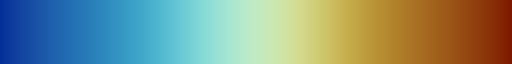

In [54]:
cmap

In [55]:
colors = {"True" : "black", "PL": cmap(0.65), "ABC": cmap(0.75), "CNN": cmap(0.3), "CNN_ES": cmap(0.1), "CNN_direct": cmap(0.95)}
labels = ["True", "PL", "ABC", "CNN", r"EN$_{\lambda, \nu}$", r"EN$_{\theta}$"]

In [56]:
ticksize = 20
fontsize = 28
axsize = 25
legendsize = 20
titlesize = 30
lw = 4

# Results plot

## Normal results

In [57]:
exp = "normal"
data_path = f'../data/{exp}/data/'
results_path = f'../data/{exp}/results/'
# Define  length of test data
n_test = 250

In [63]:
#Load examples
model = "brown"

# Load true parameters
true_parameters = np.load(data_path+model+"_test_params.npy")[0:n_test]
# Load PL
pl = pyreadr.read_r(results_path+model+"_pl.RData")["results"].to_numpy()[0:n_test,0:2]
# Load ABC
abc = xr.open_dataset(results_path + model + "_abc_results.nc").results.data[:,0:2]
# Load normal network
cnn = np.load(results_path+model+"_cnn.npy")[0:n_test]

# Load energy network
cnn_es = np.load(results_path+model+"_cnn_es.npy")[0:n_test]

# Load direct estimation
cnn_direct = np.load(results_path + model + "_cnn_es_theta.npy")[0:n_test]

#Get mean prediction
abc_mean = np.mean(abc, axis = 2)
cnn_es_mean = np.mean(cnn_es, axis = 2)

### Single plot

True parameters: [2.25312956 0.68807789]


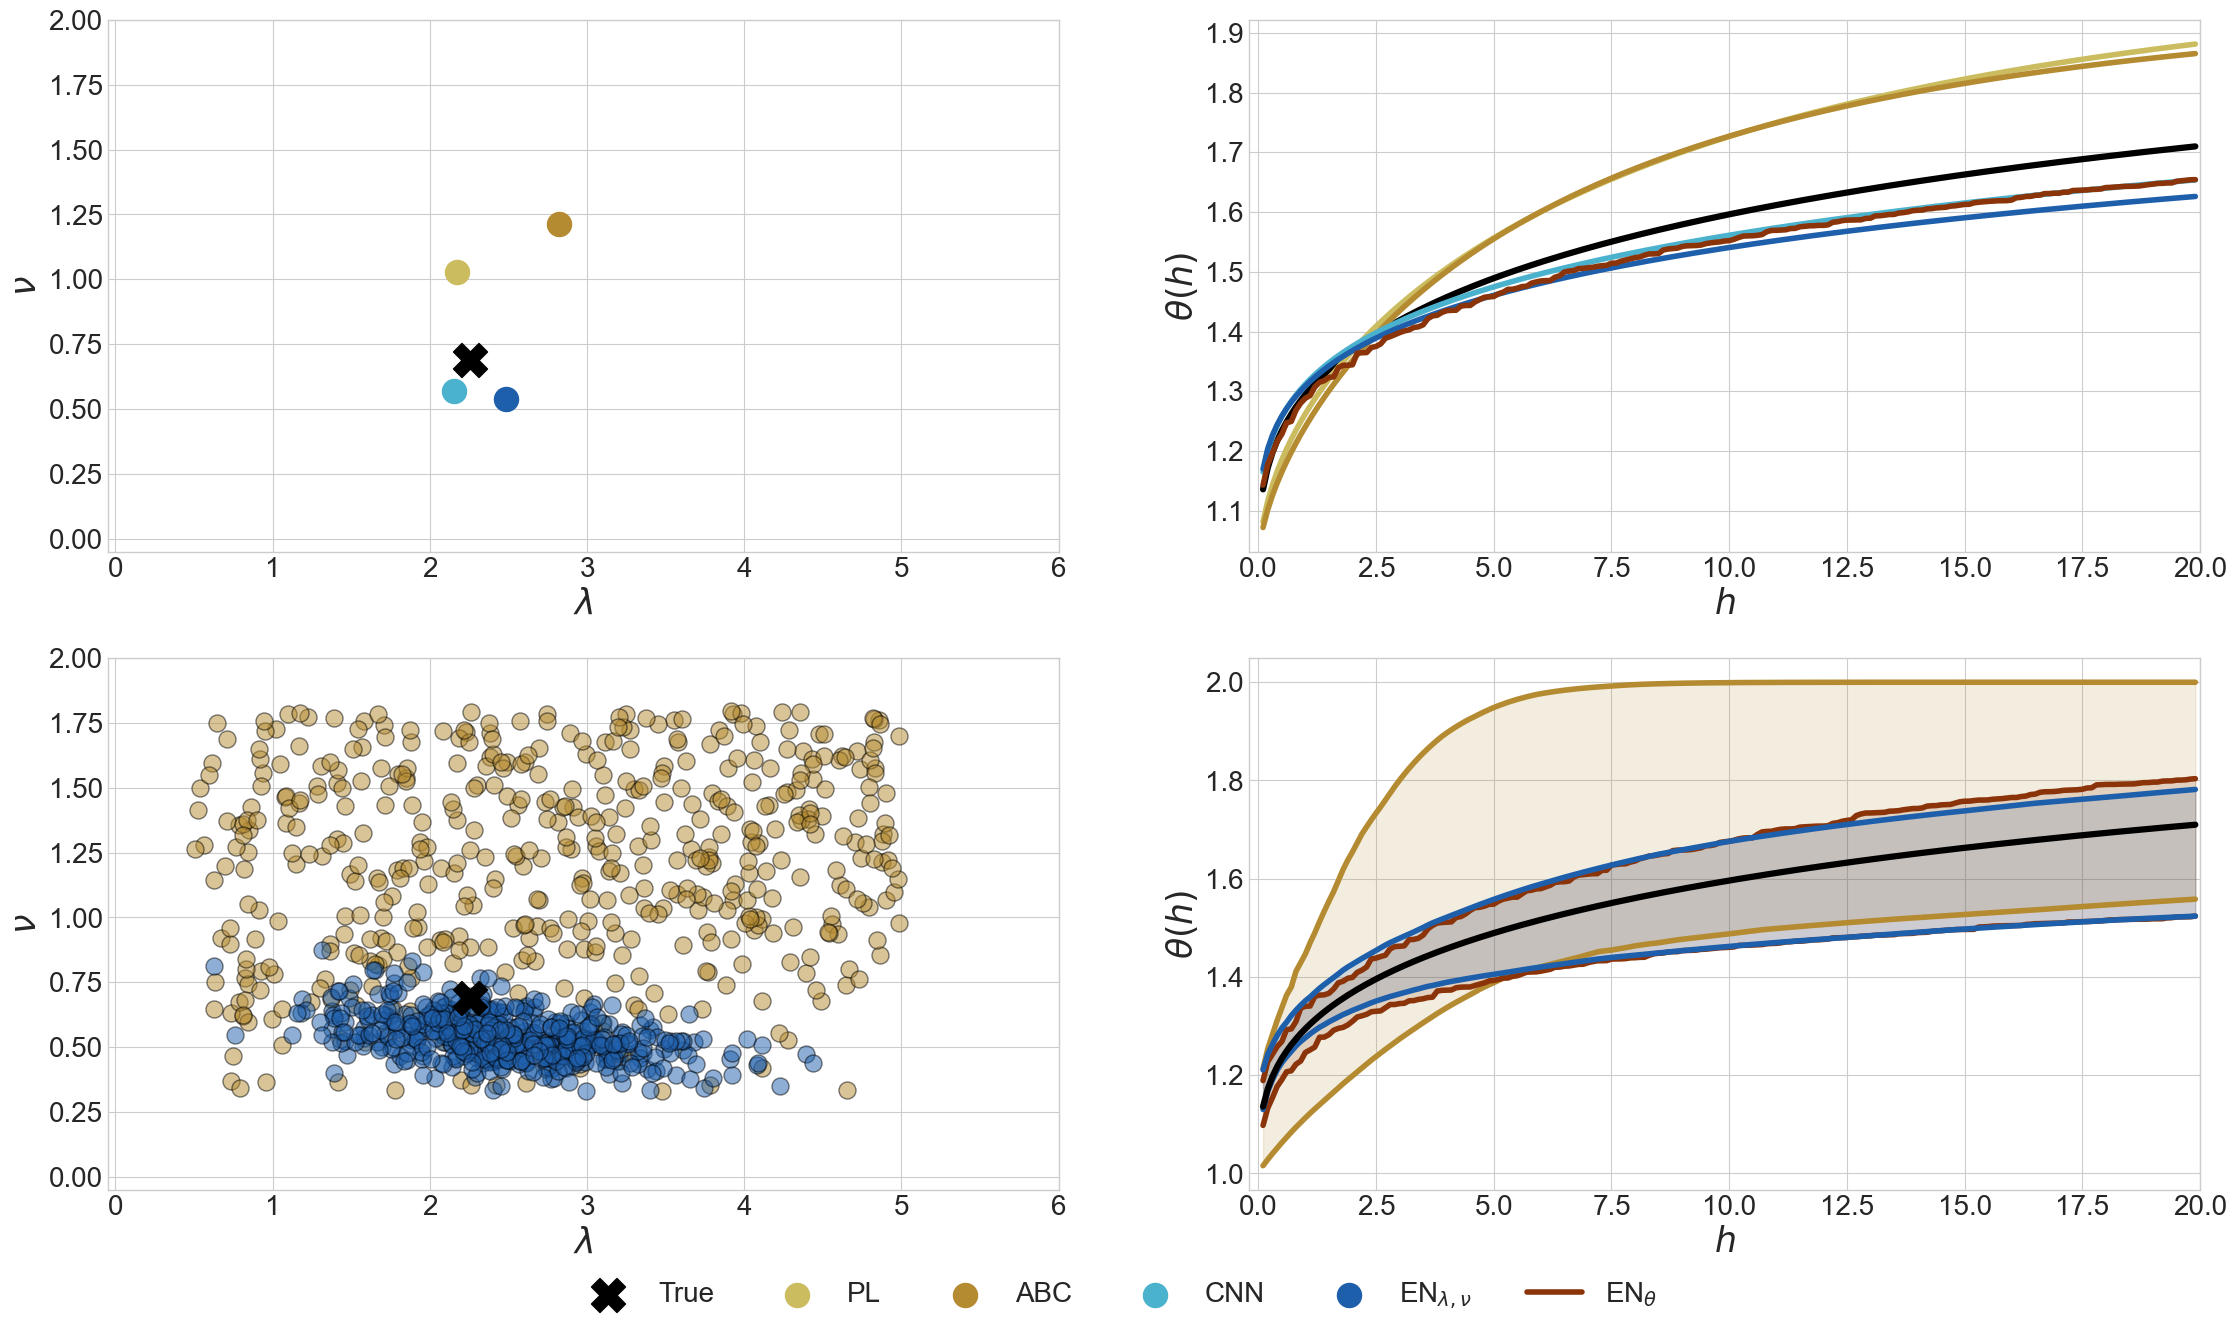

In [64]:
# For Brown use sample 110 for Powexp 93
sample = 93#110
print(f"True parameters: {true_parameters[sample]}")


h = np.arange(0.1,20,0.1)
h_len = len(h)
fig, axs = plt.subplots(2, 2, figsize = (27,15))
axs = np.transpose(axs).ravel()

#Mean values
l1 = axs[0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
l2 = axs[0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
l3 = axs[0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
l4 = axs[0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
l5 = axs[0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
axs[0].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[0].set_ylabel(r"$\nu$", fontsize = axsize)
axs[0].tick_params(axis='both', labelsize=ticksize)
axs[0].set_xlim([-0.05,6])
axs[0].set_ylim([-0.05,2])


# Sample values
axs[1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
axs[1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
axs[1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
axs[1].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[1].set_ylabel(r"$\nu$", fontsize = axsize)
axs[1].tick_params(axis='both', labelsize=ticksize)
axs[1].set_xlim([-0.05,6])
axs[1].set_ylim([-0.05,2])


# Extremal coefficient
axs[2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
axs[2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
axs[2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
l6, = axs[2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
axs[2].set_xlabel(r"$h$", fontsize = axsize)
axs[2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[2].tick_params(axis='both', labelsize=ticksize)
axs[2].set_xlim([-0.2,20])

# Extremal coefficient uncertainty
es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

axs[3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
axs[3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
axs[3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

axs[3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
axs[3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
axs[3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

axs[3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
axs[3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
axs[3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

axs[3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)


axs[3].set_xlabel(r"$h$", fontsize = axsize)
axs[3].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[3].tick_params(axis='both', labelsize=ticksize)
axs[3].set_xlim([-0.2,20])

# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles =[l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

#fig.suptitle(f"Test sample: {sample}", fontsize = titlesize)

plt.savefig(path + f"normal_results_example_{model}_single.pdf", bbox_inches = "tight")

### Multiple random plots

True parameters: [[1.37 0.89]
 [3.93 1.04]
 [4.38 1.65]
 [3.4  1.6 ]]


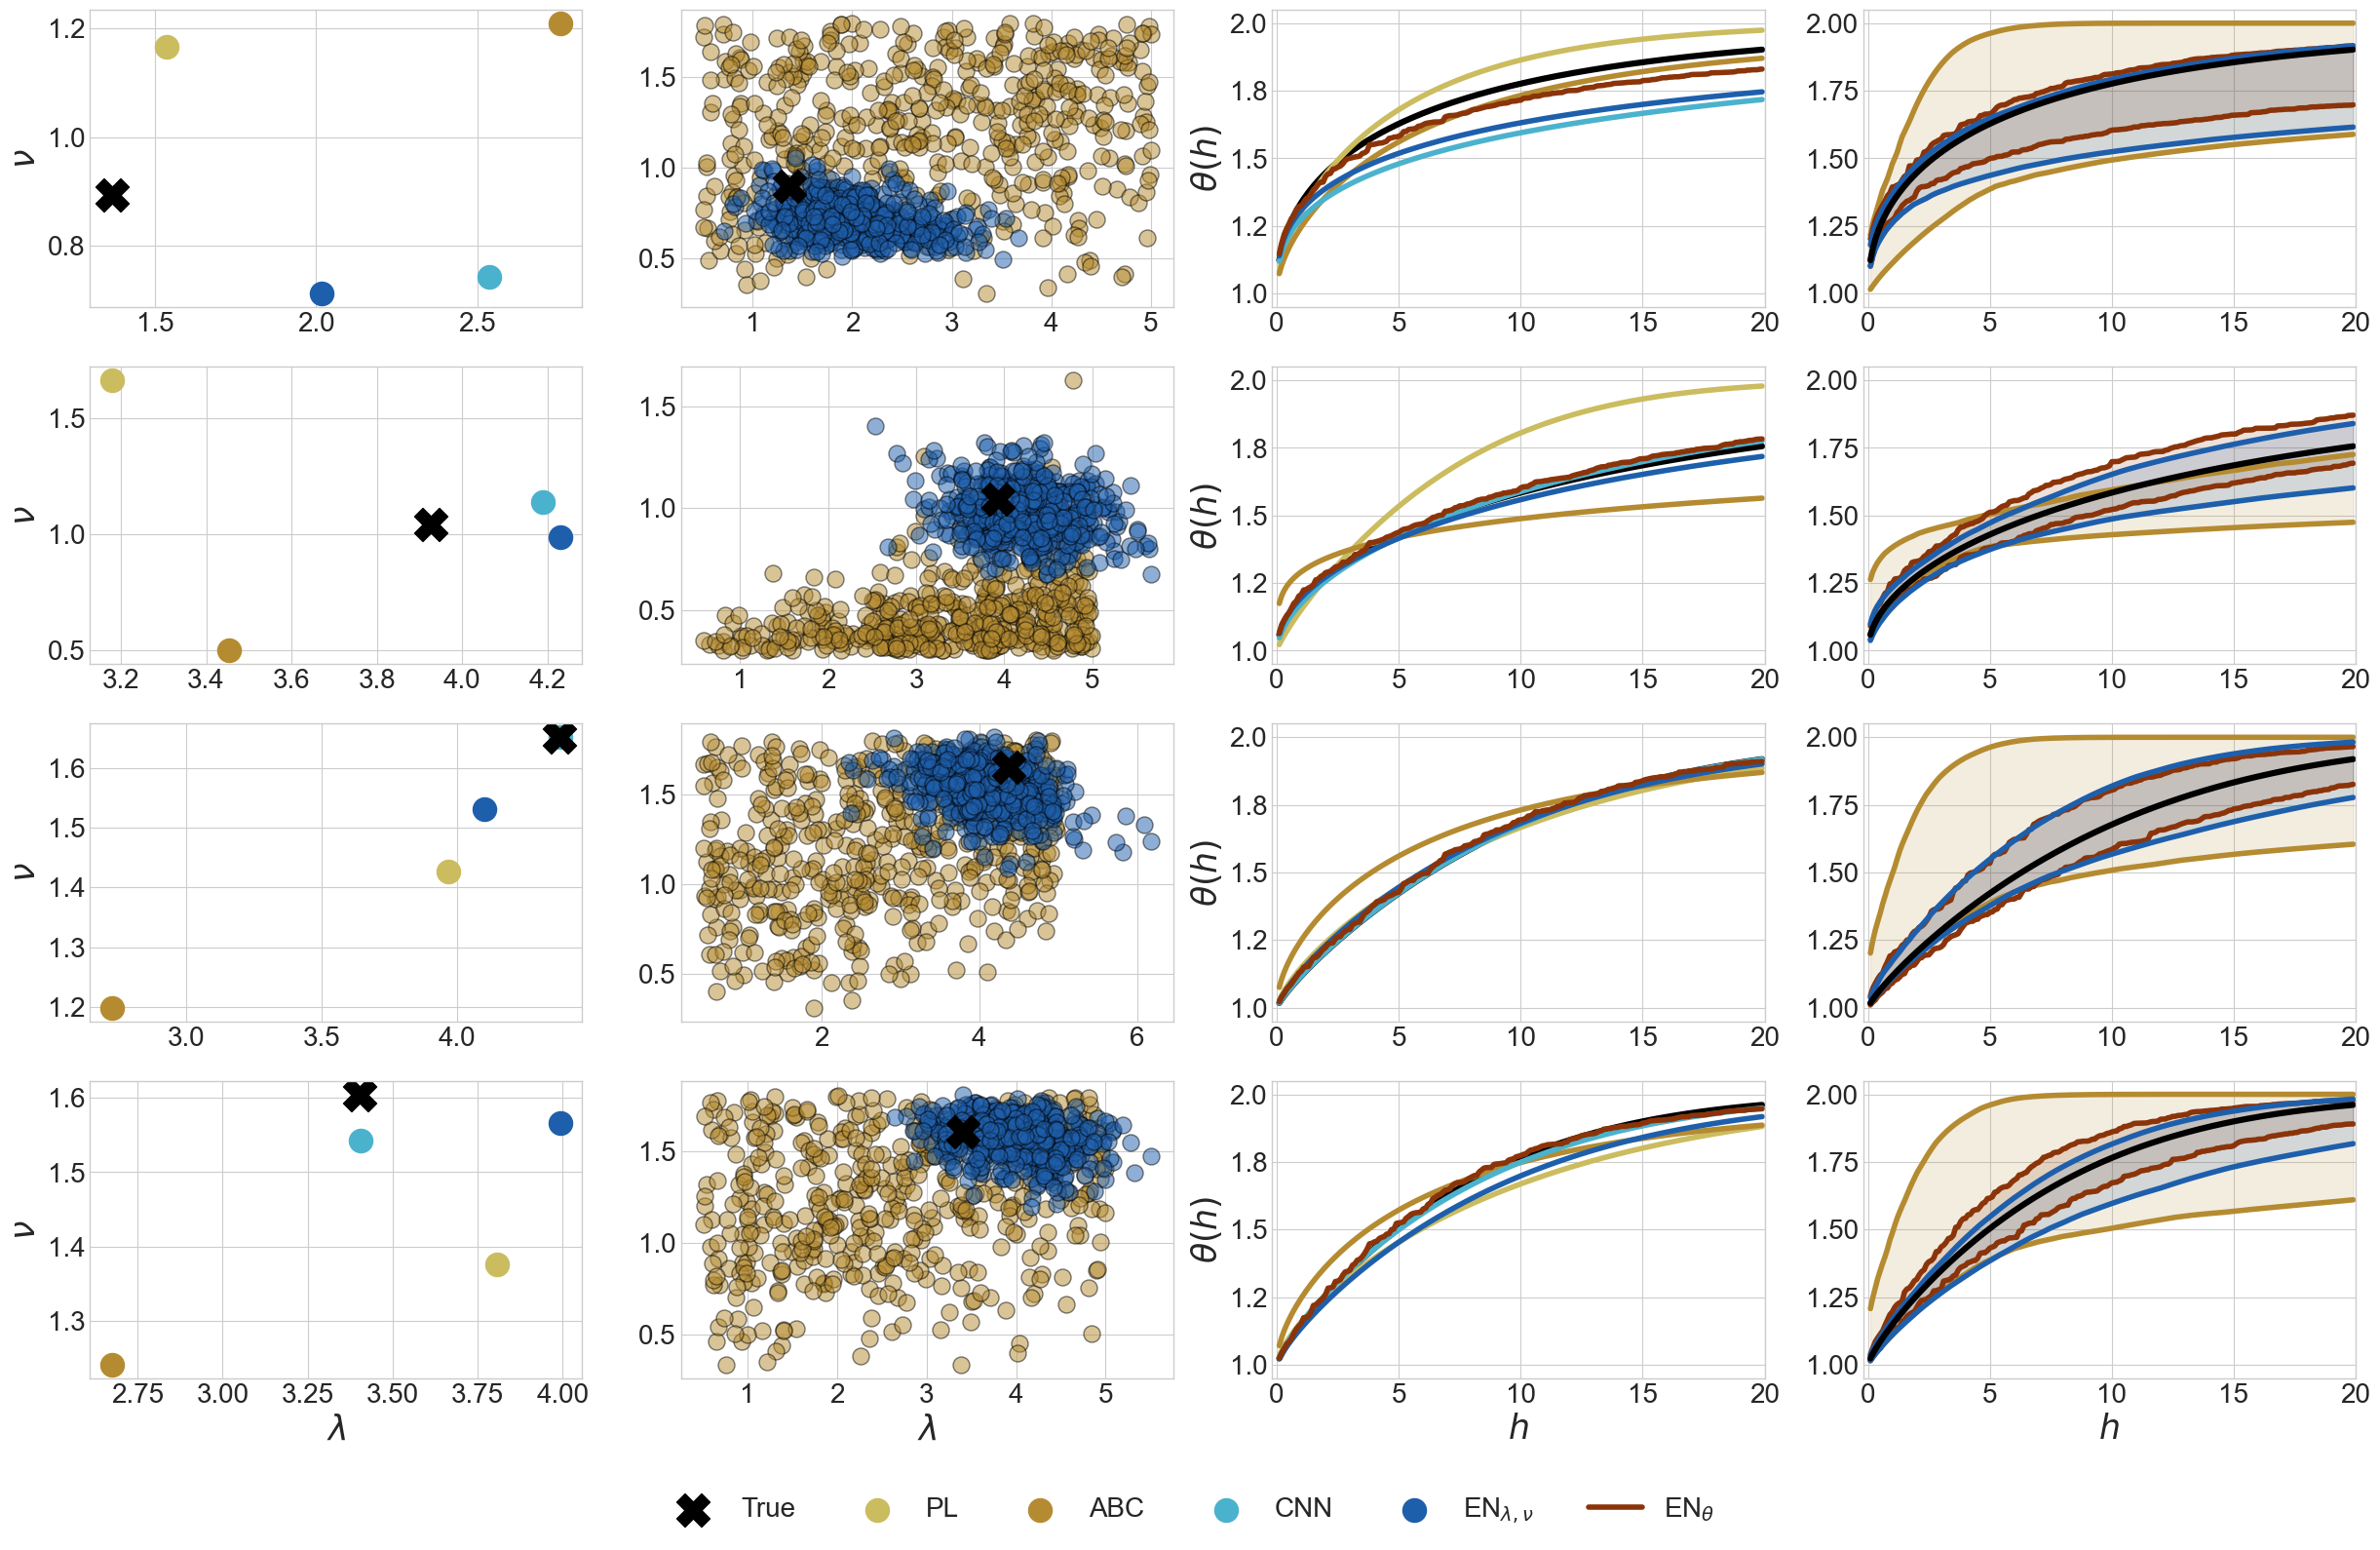

In [65]:
# Use randomly drawn samples
samples = [241, 167, 141,  56]#np.random.randint(0, n_test, size = 4)
print(f"True parameters: {true_parameters[samples].round(2)}")
h = np.arange(0.1,20,0.1)
h_len = len(h)

fig, axs = plt.subplots(4, 4, figsize = (30,18))

for i, sample in enumerate(samples):
    #Mean values
    l1 = axs[i,0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
    l2 = axs[i,0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
    l3 = axs[i,0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
    l4 = axs[i,0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
    l5 = axs[i,0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
    axs[3,0].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,0].set_ylabel(r"$\nu$", fontsize = axsize)
    axs[i,0].tick_params(axis='both', labelsize=ticksize)

    # Sample values
    axs[i,1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
    axs[3,1].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,1].tick_params(axis='both', labelsize=ticksize)


    # Extremal coefficient
    axs[i,2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[i,2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
    axs[i,2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
    l6, = axs[i,2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
    axs[3,2].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
    axs[i,2].tick_params(axis='both', labelsize=ticksize)
    axs[i,2].set_xlim([-0.2,20])
    axs[i,2].set_ylim([0.95,2.05])
    axs[i,2].yaxis.set_major_formatter('{x:.1f}')
    axs[i,2].yaxis.set_ticks(np.arange(1, 2.25, 1/4))

    # Extremal coefficient uncertainty
    es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
    abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

    direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
    direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

    axs[i,3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
    axs[i,3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
    axs[i,3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

    axs[i,3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
    axs[i,3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
    axs[i,3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

    axs[i,3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
    axs[i,3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
    axs[i,3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

    axs[i,3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[3,3].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,3].tick_params(axis='both', labelsize=ticksize)
    axs[i,3].set_xlim([-0.2,20])
    axs[i,3].set_ylim([0.95,2.05])
    axs[i,3].yaxis.set_ticks(np.arange(1, 2.25, 1/4))


# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

plt.savefig(path + f"normal_results_example_{model}_multiple.pdf", bbox_inches = "tight")

## Outside parameters

In [66]:
exp = "outside_parameters"
data_path = f'../data/{exp}/data/'
results_path = f'../data/{exp}/results/'
# Define  length of test data
n_test = 250

In [67]:
#Load examples
model = "brown"

# Load true parameters
true_parameters = np.load(data_path+model+"_test_params.npy")[0:n_test]
# Load PL
pl = pyreadr.read_r(results_path+model+"_pl.RData")["results"].to_numpy()[0:n_test,0:2]
# Load ABC
abc = xr.open_dataset(results_path + model + "_abc_results.nc").results.data[:,0:2]
# Load normal network
cnn = np.load(results_path+model+"_cnn.npy")[0:n_test]

# Load energy network
cnn_es = np.load(results_path+model+"_cnn_es.npy")[0:n_test]

# Load direct estimation
cnn_direct = np.load(results_path + model + "_cnn_es_theta.npy")[0:n_test]

#Get mean prediction
abc_mean = np.mean(abc, axis = 2)
cnn_es_mean = np.mean(cnn_es, axis = 2)

True parameters: [9.03733954 1.64227931]


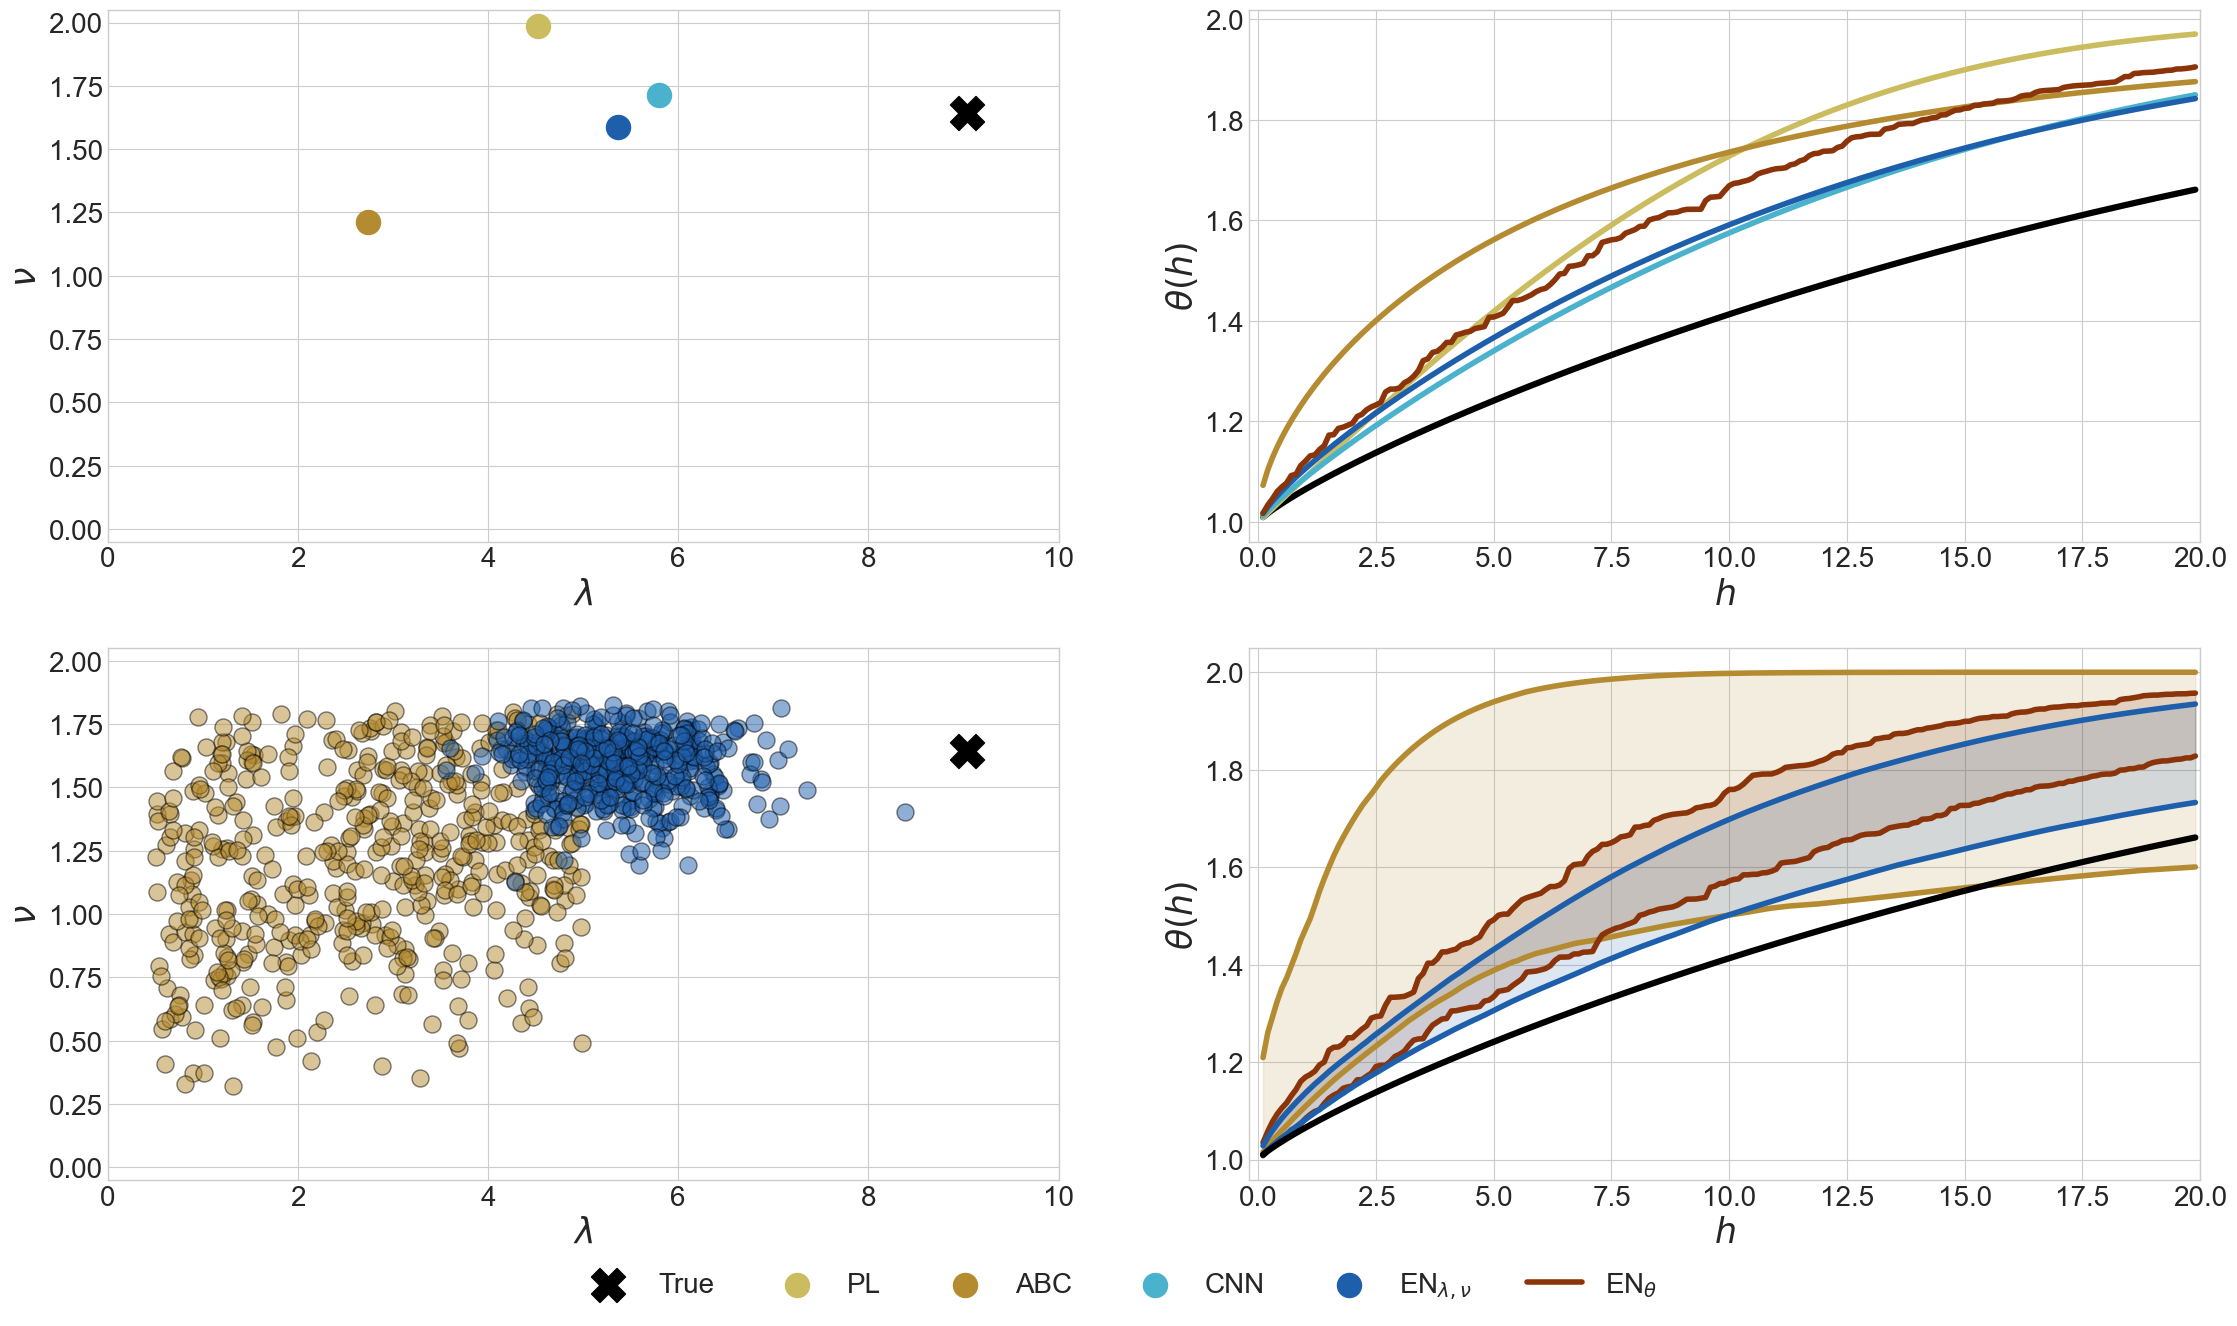

In [68]:
# Use sample 51
sample = 51
print(f"True parameters: {true_parameters[sample]}")


h = np.arange(0.1,20,0.1)
h_len = len(h)
fig, axs = plt.subplots(2, 2, figsize = (27,15))
axs = np.transpose(axs).ravel()

#Mean values
l1 = axs[0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
l2 = axs[0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
l3 = axs[0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
l4 = axs[0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
l5 = axs[0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
axs[0].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[0].set_ylabel(r"$\nu$", fontsize = axsize)
axs[0].tick_params(axis='both', labelsize=ticksize)
axs[0].set_xlim([0,10])
axs[0].set_ylim([-0.05,2.05])


# Sample values
axs[1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
axs[1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
axs[1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
axs[1].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[1].set_ylabel(r"$\nu$", fontsize = axsize)
axs[1].tick_params(axis='both', labelsize=ticksize)
axs[1].set_xlim([0,10])
axs[1].set_ylim([-0.05,2.05])


# Extremal coefficient
axs[2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
axs[2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
axs[2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
l6, axs[2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
axs[2].set_xlabel(r"$h$", fontsize = axsize)
axs[2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[2].tick_params(axis='both', labelsize=ticksize)
axs[2].set_xlim([-0.2,20])

# Extremal coefficient uncertainty
es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

axs[3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
axs[3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
axs[3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

axs[3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
axs[3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
axs[3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

axs[3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
axs[3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
axs[3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

axs[3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)


axs[3].set_xlabel(r"$h$", fontsize = axsize)
axs[3].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[3].tick_params(axis='both', labelsize=ticksize)
axs[3].set_xlim([-0.2,20])

# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

#fig.suptitle(f"Test sample: {sample}", fontsize = titlesize)

plt.savefig(path + f"robust_results_example_{model}_single.pdf", bbox_inches = "tight")

True parameters: [[4.85 1.81]
 [3.47 1.85]
 [3.99 1.85]
 [2.27 0.29]]


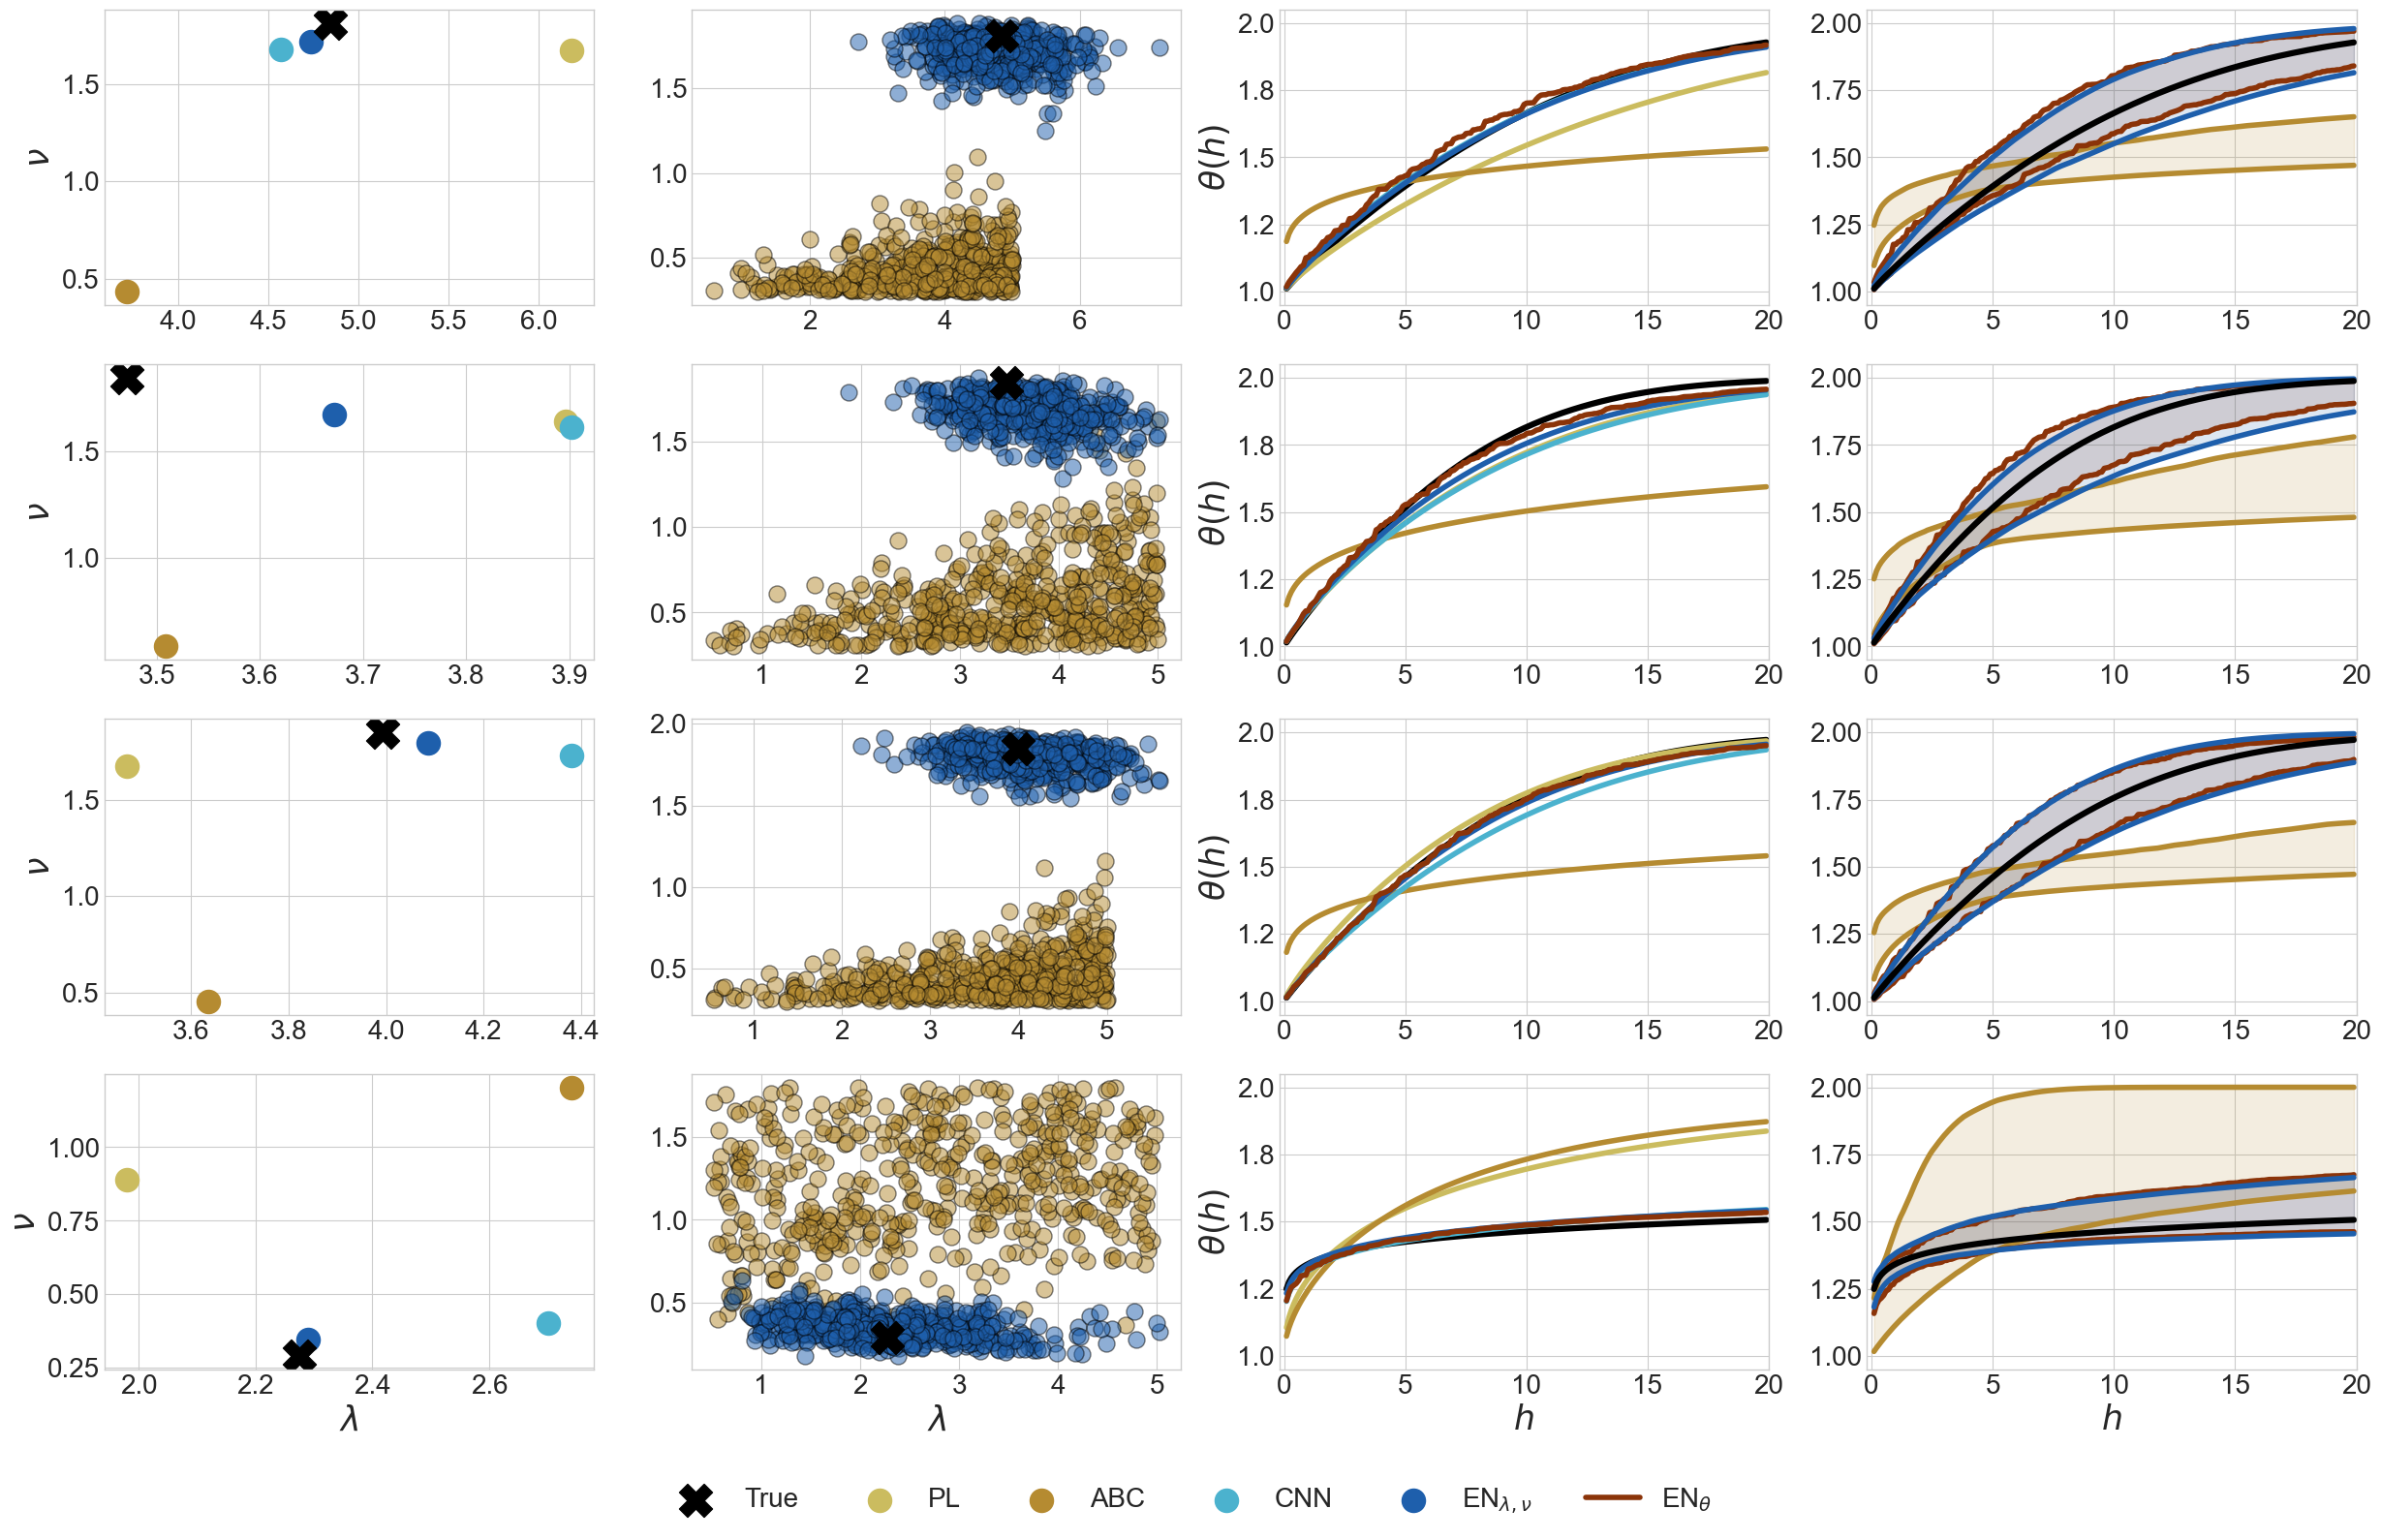

In [69]:
# Use randomly drawn samples
samples = [199, 178,  89, 240]#np.random.randint(0, n_test, size = 4)
print(f"True parameters: {true_parameters[samples].round(2)}")
h = np.arange(0.1,20,0.1)
h_len = len(h)

fig, axs = plt.subplots(4, 4, figsize = (30,18))

for i, sample in enumerate(samples):
    #Mean values
    l1 = axs[i,0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
    l2 = axs[i,0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
    l3 = axs[i,0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
    l4 = axs[i,0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
    l5 = axs[i,0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
    axs[3,0].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,0].set_ylabel(r"$\nu$", fontsize = axsize)
    axs[i,0].tick_params(axis='both', labelsize=ticksize)

    # Sample values
    axs[i,1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
    axs[3,1].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,1].tick_params(axis='both', labelsize=ticksize)


    # Extremal coefficient
    axs[i,2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[i,2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
    axs[i,2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
    l6, = axs[i,2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
    axs[3,2].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
    axs[i,2].tick_params(axis='both', labelsize=ticksize)
    axs[i,2].set_xlim([-0.2,20])
    axs[i,2].set_ylim([0.95,2.05])
    axs[i,2].yaxis.set_major_formatter('{x:.1f}')
    axs[i,2].yaxis.set_ticks(np.arange(1, 2.25, 1/4))

    # Extremal coefficient uncertainty
    es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
    abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

    direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
    direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

    axs[i,3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
    axs[i,3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
    axs[i,3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

    axs[i,3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
    axs[i,3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
    axs[i,3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

    axs[i,3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
    axs[i,3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
    axs[i,3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

    axs[i,3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[3,3].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,3].tick_params(axis='both', labelsize=ticksize)
    axs[i,3].set_xlim([-0.2,20])
    axs[i,3].set_ylim([0.95,2.05])
    axs[i,3].yaxis.set_ticks(np.arange(1, 2.25, 1/4))


# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

plt.savefig(path + f"robust_results_example_{model}_multiple.pdf", bbox_inches = "tight")

## Outside model

In [31]:
exp = "outside_model"
data_path = f'../data/{exp}/data/'
results_path = f'../data/{exp}/results/'
# Define  length of test data
n_test = 250

### Whitmat

In [39]:
#Load examples
model = "whitmat"
model2 = "powexp"

# Load true parameters
true_parameters = np.load(data_path+model+"_test_params.npy")[0:n_test]
# Load PL
pl = pyreadr.read_r(results_path+model+"_pl.RData")["results"].to_numpy()[0:n_test,0:2]
# Load ABC
abc = xr.open_dataset(results_path + model + "_abc_results.nc").results.data[:,0:2]
# Load normal network
cnn = np.load(results_path+model+"_cnn.npy")[0:n_test]

# Load energy network
cnn_es = np.load(results_path+model+"_cnn_es.npy")[0:n_test]

# Load direct estimation
cnn_direct = np.load(results_path + model + "_cnn_es_theta.npy")[0:n_test]

#Get mean prediction
abc_mean = np.mean(abc, axis = 2)
cnn_es_mean = np.mean(cnn_es, axis = 2)

True parameters: [3.99904976 0.80622459]


c:\Users\chris\Desktop\Forschung\MA_paper\code\plots\..\evaluation\metrics.py:44: RuntimeWarning: divide by zero encountered in divide
  res = np.exp(-np.power((h / r), s))


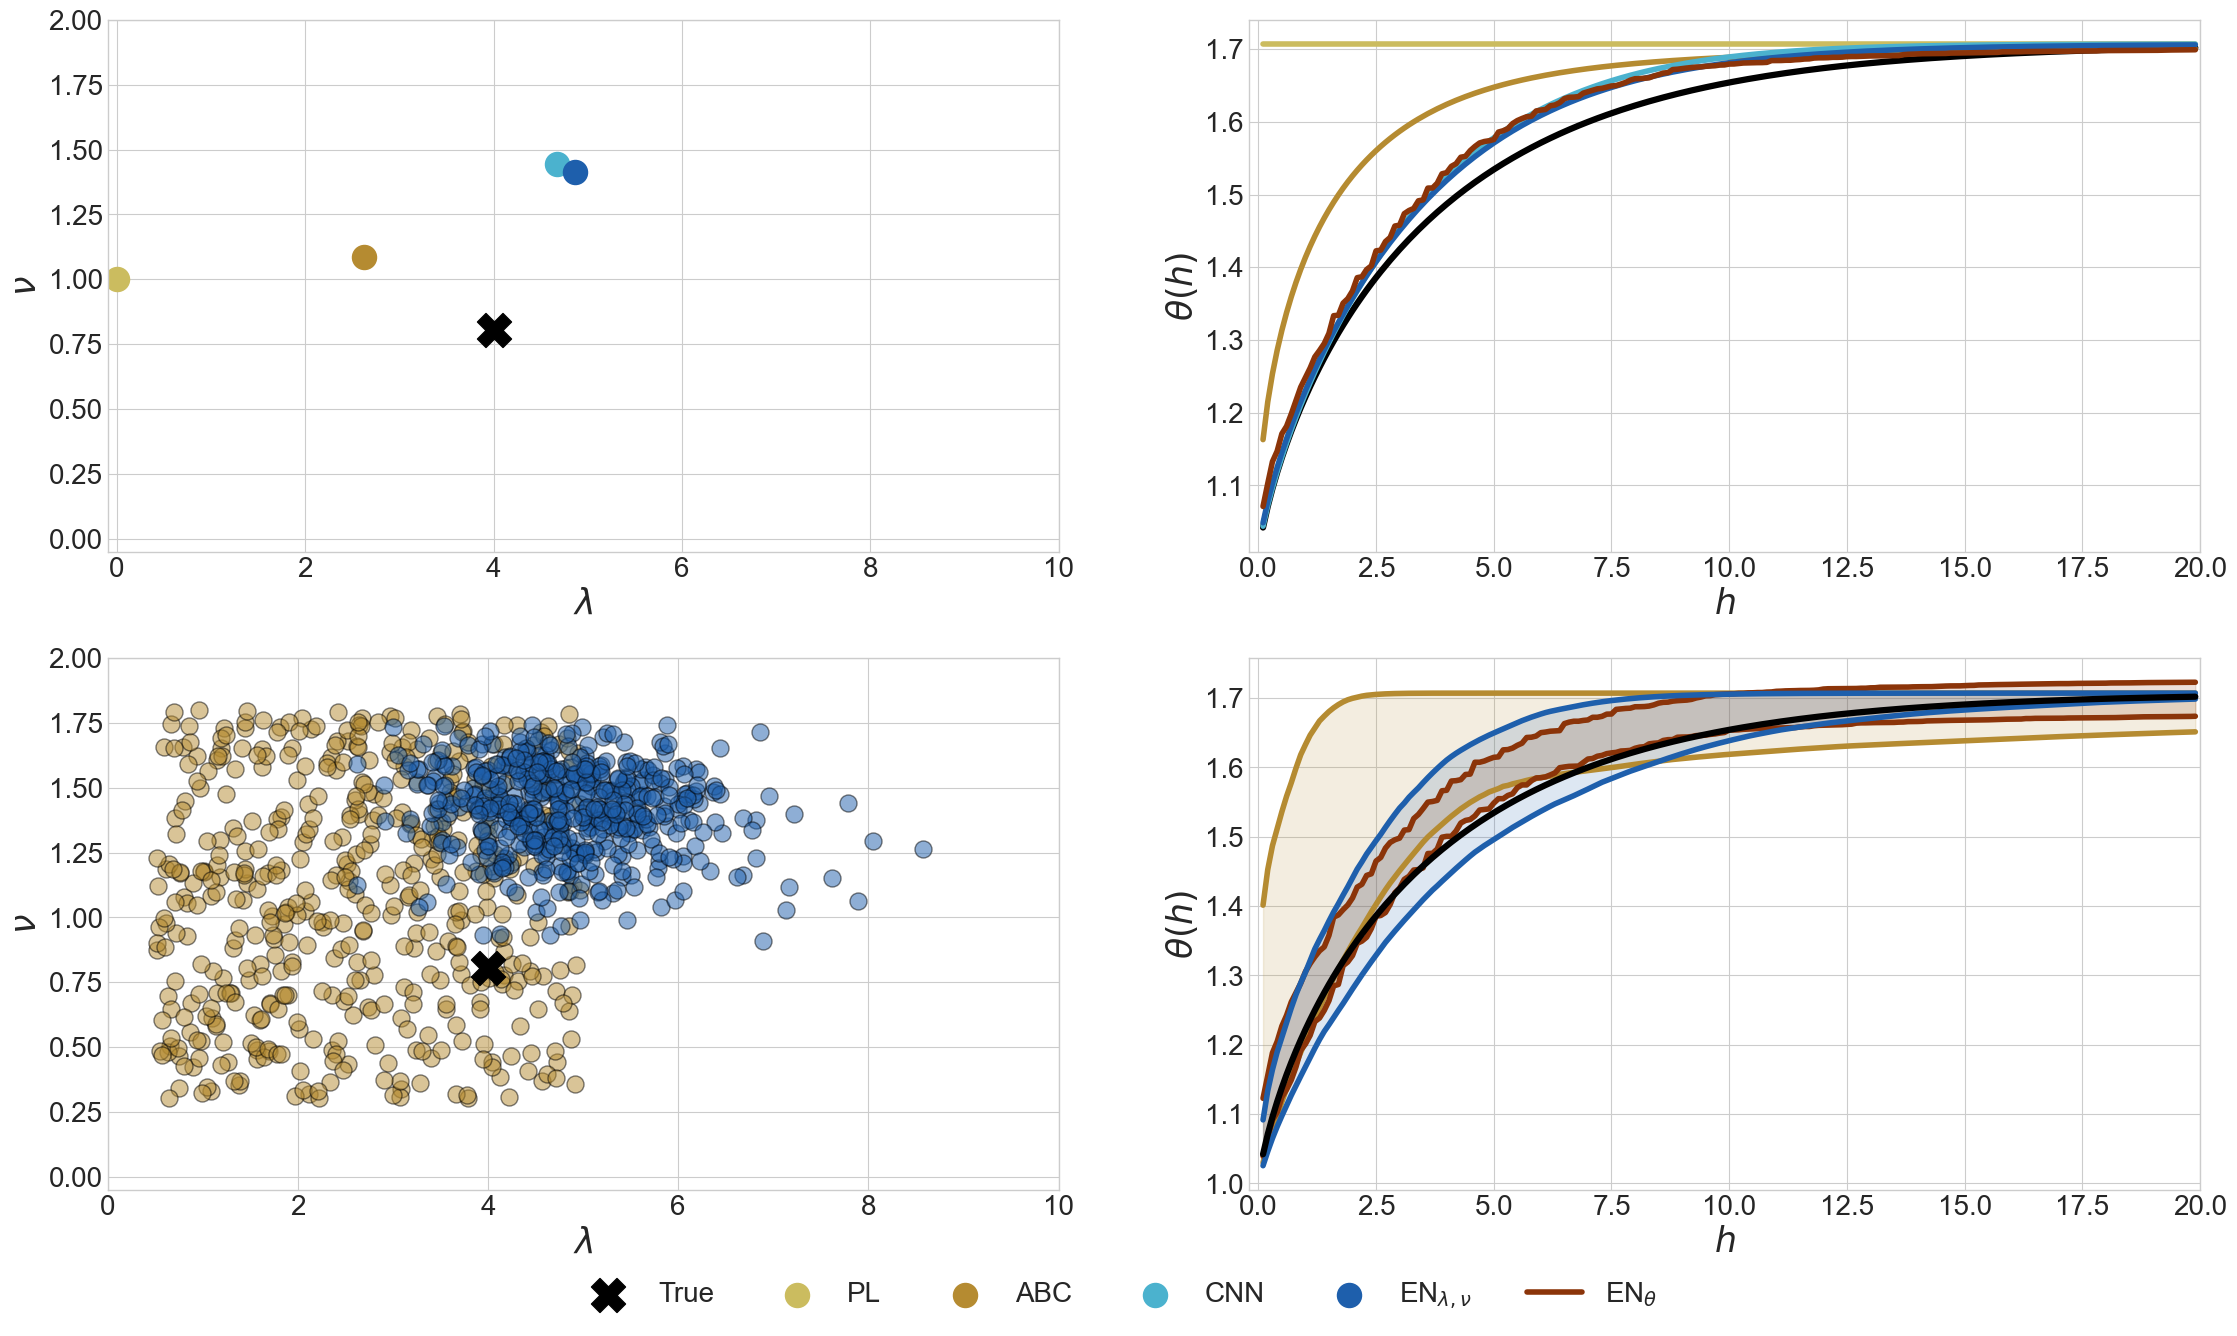

In [41]:
# Use sample 60
sample = 60
print(f"True parameters: {true_parameters[sample]}")


h = np.arange(0.1,20,0.1)
h_len = len(h)
fig, axs = plt.subplots(2, 2, figsize = (27,15))
axs = np.transpose(axs).ravel()

#Mean values
l1 = axs[0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
l2 = axs[0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
l3 = axs[0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
l4 = axs[0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
l5 = axs[0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
axs[0].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[0].set_ylabel(r"$\nu$", fontsize = axsize)
axs[0].tick_params(axis='both', labelsize=ticksize)
axs[0].set_xlim([-0.1,10])
axs[0].set_ylim([-0.05,2])


# Sample values
axs[1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
axs[1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
axs[1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
axs[1].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[1].set_ylabel(r"$\nu$", fontsize = axsize)
axs[1].tick_params(axis='both', labelsize=ticksize)
axs[1].set_xlim([0,10])
axs[1].set_ylim([-0.05,2])


# Extremal coefficient
axs[2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
axs[2].plot(h, extremal_coefficient(h, model2, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model2, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
axs[2].plot(h, extremal_coefficient(h, model2, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model2, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
l6, = axs[2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
axs[2].set_xlabel(r"$h$", fontsize = axsize)
axs[2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[2].tick_params(axis='both', labelsize=ticksize)
axs[2].set_xlim([-0.2,20])

# Extremal coefficient uncertainty
es_quantiles = np.quantile(sample_extremal_coefficient(h, model2, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
abc_quantiles = np.quantile(sample_extremal_coefficient(h, model2, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

axs[3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
axs[3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
axs[3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

axs[3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
axs[3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
axs[3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

axs[3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
axs[3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
axs[3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

axs[3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)


axs[3].set_xlabel(r"$h$", fontsize = axsize)
axs[3].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[3].tick_params(axis='both', labelsize=ticksize)
axs[3].set_xlim([-0.2,20])

# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6],loc='lower center', ncol = 6, fontsize = legendsize)

#fig.suptitle(f"Test sample: {sample}", fontsize = titlesize)

plt.savefig(path + f"robust_results_example_{model}_single.pdf", bbox_inches = "tight")

True parameters: [[3.84 1.36]
 [1.12 0.5 ]
 [1.82 1.48]
 [3.18 0.7 ]]


c:\Users\chris\Desktop\Forschung\MA_paper\code\plots\..\evaluation\metrics.py:44: RuntimeWarning: divide by zero encountered in divide
  res = np.exp(-np.power((h / r), s))


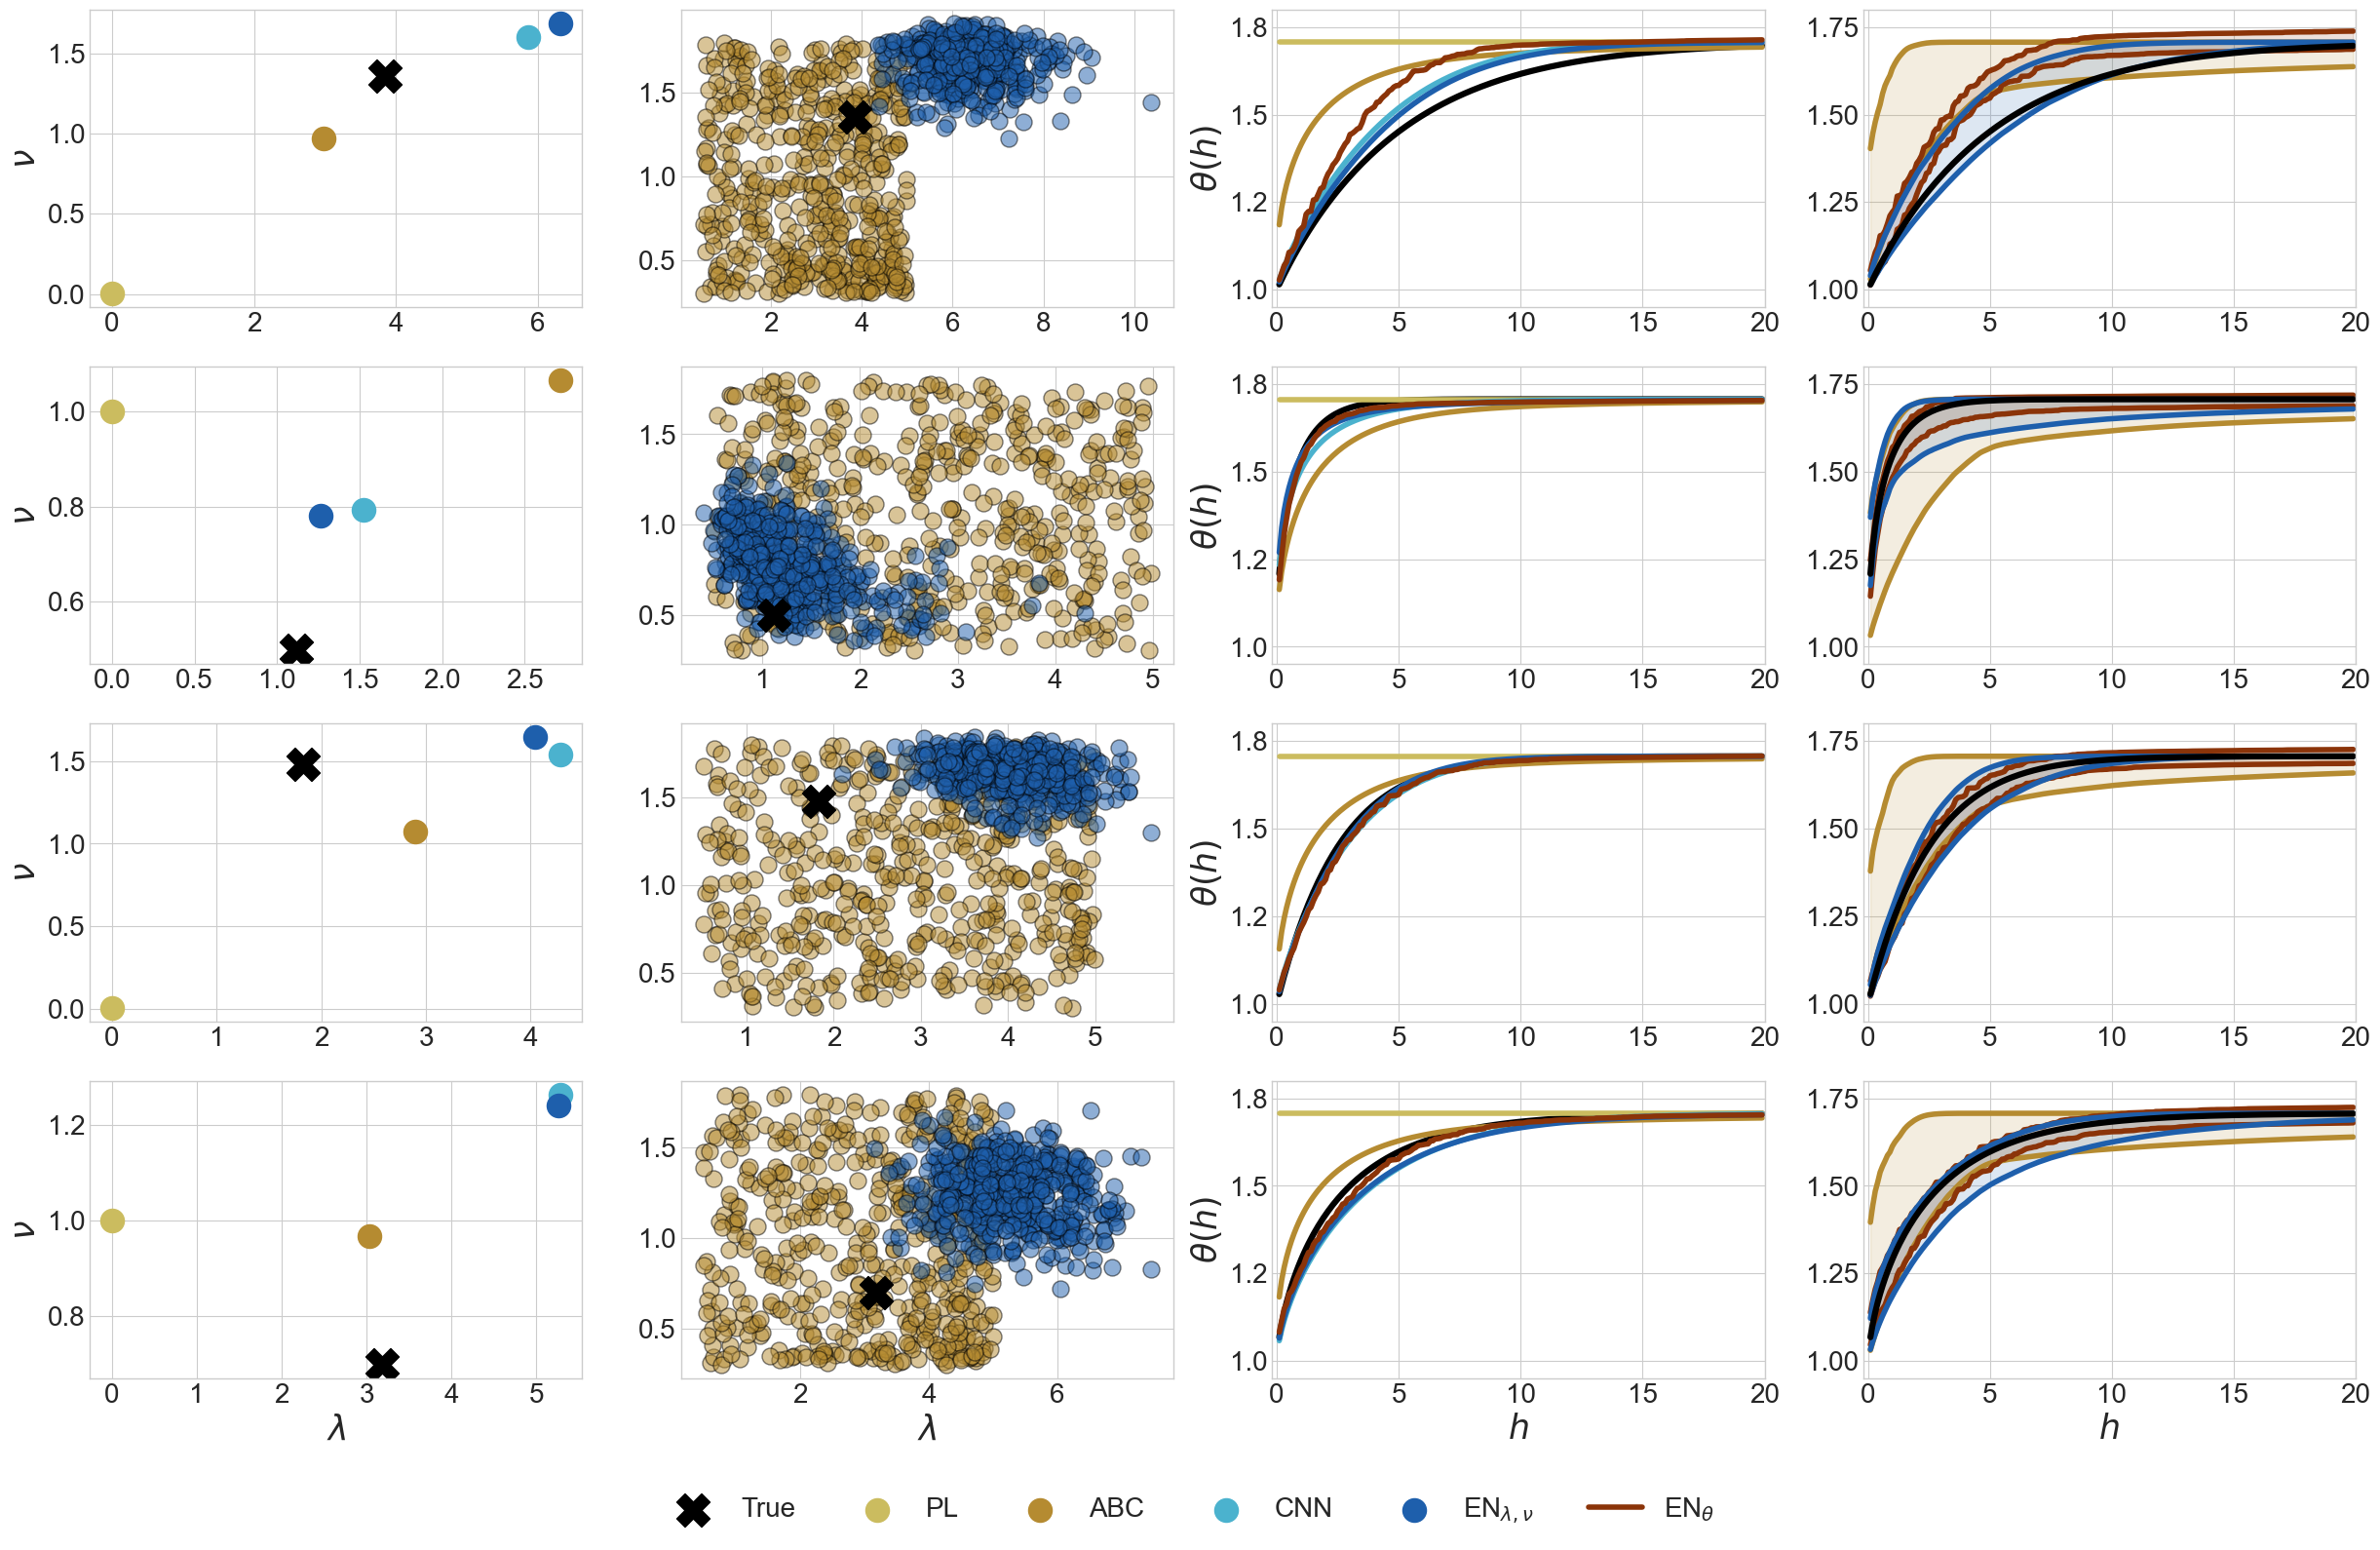

In [46]:
# Use randomly drawn samples
samples = [ 74,  18, 206,  91]#np.random.randint(0, n_test, size = 4)
print(f"True parameters: {true_parameters[samples].round(2)}")
h = np.arange(0.1,20,0.1)
h_len = len(h)

fig, axs = plt.subplots(4, 4, figsize = (30,18))

for i, sample in enumerate(samples):
    #Mean values
    l1 = axs[i,0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
    l2 = axs[i,0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
    l3 = axs[i,0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
    l4 = axs[i,0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
    l5 = axs[i,0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
    axs[3,0].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,0].set_ylabel(r"$\nu$", fontsize = axsize)
    axs[i,0].tick_params(axis='both', labelsize=ticksize)

    # Sample values
    axs[i,1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
    axs[3,1].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,1].tick_params(axis='both', labelsize=ticksize)


    # Extremal coefficient
    axs[i,2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[i,2].plot(h, extremal_coefficient(h, model2, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model2, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
    axs[i,2].plot(h, extremal_coefficient(h, model2, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model2, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
    l6, = axs[i,2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
    axs[3,2].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
    axs[i,2].tick_params(axis='both', labelsize=ticksize)
    axs[i,2].set_xlim([-0.2,20])
    axs[i,2].set_ylim([0.95,1.8])
    axs[i,2].yaxis.set_major_formatter('{x:.1f}')
    axs[i,2].yaxis.set_ticks(np.arange(1, 1.8, 1/4))

    # Extremal coefficient uncertainty
    es_quantiles = np.quantile(sample_extremal_coefficient(h, model2, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
    abc_quantiles = np.quantile(sample_extremal_coefficient(h, model2, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

    direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
    direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

    axs[i,3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
    axs[i,3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
    axs[i,3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

    axs[i,3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
    axs[i,3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
    axs[i,3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

    axs[i,3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
    axs[i,3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
    axs[i,3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

    axs[i,3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[3,3].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,3].tick_params(axis='both', labelsize=ticksize)
    axs[i,3].set_xlim([-0.2,20])
    axs[i,3].set_ylim([0.95,1.8])
    axs[i,3].yaxis.set_ticks(np.arange(1, 1.8, 1/4))


# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

plt.savefig(path + f"robust_results_example_{model}_multiple.pdf", bbox_inches = "tight")

### Smith 

In [47]:
#Load examples
model = "brown"
# Load true parameters
true_parameters = np.load(data_path+model+"_test_params.npy")[0:n_test]
# Transform
true_parameters[:,0] = np.sqrt(2 * true_parameters[:,0])
# Load PL
pl = pyreadr.read_r(results_path+model+"_pl.RData")["results"].to_numpy()[0:n_test,0:2]
# Load ABC
abc = xr.open_dataset(results_path + model + "_abc_results.nc").results.data[:,0:2]
# Load normal network
cnn = np.load(results_path+model+"_cnn.npy")[0:n_test]

# Load energy network
cnn_es = np.load(results_path+model+"_cnn_es.npy")[0:n_test]

# Load direct estimation
cnn_direct = np.load(results_path + model + "_cnn_es_theta.npy")[0:n_test]

#Get mean prediction
abc_mean = np.mean(abc, axis = 2)
cnn_es_mean = np.mean(cnn_es, axis = 2)

True parameters: [1.62665302 2.        ]


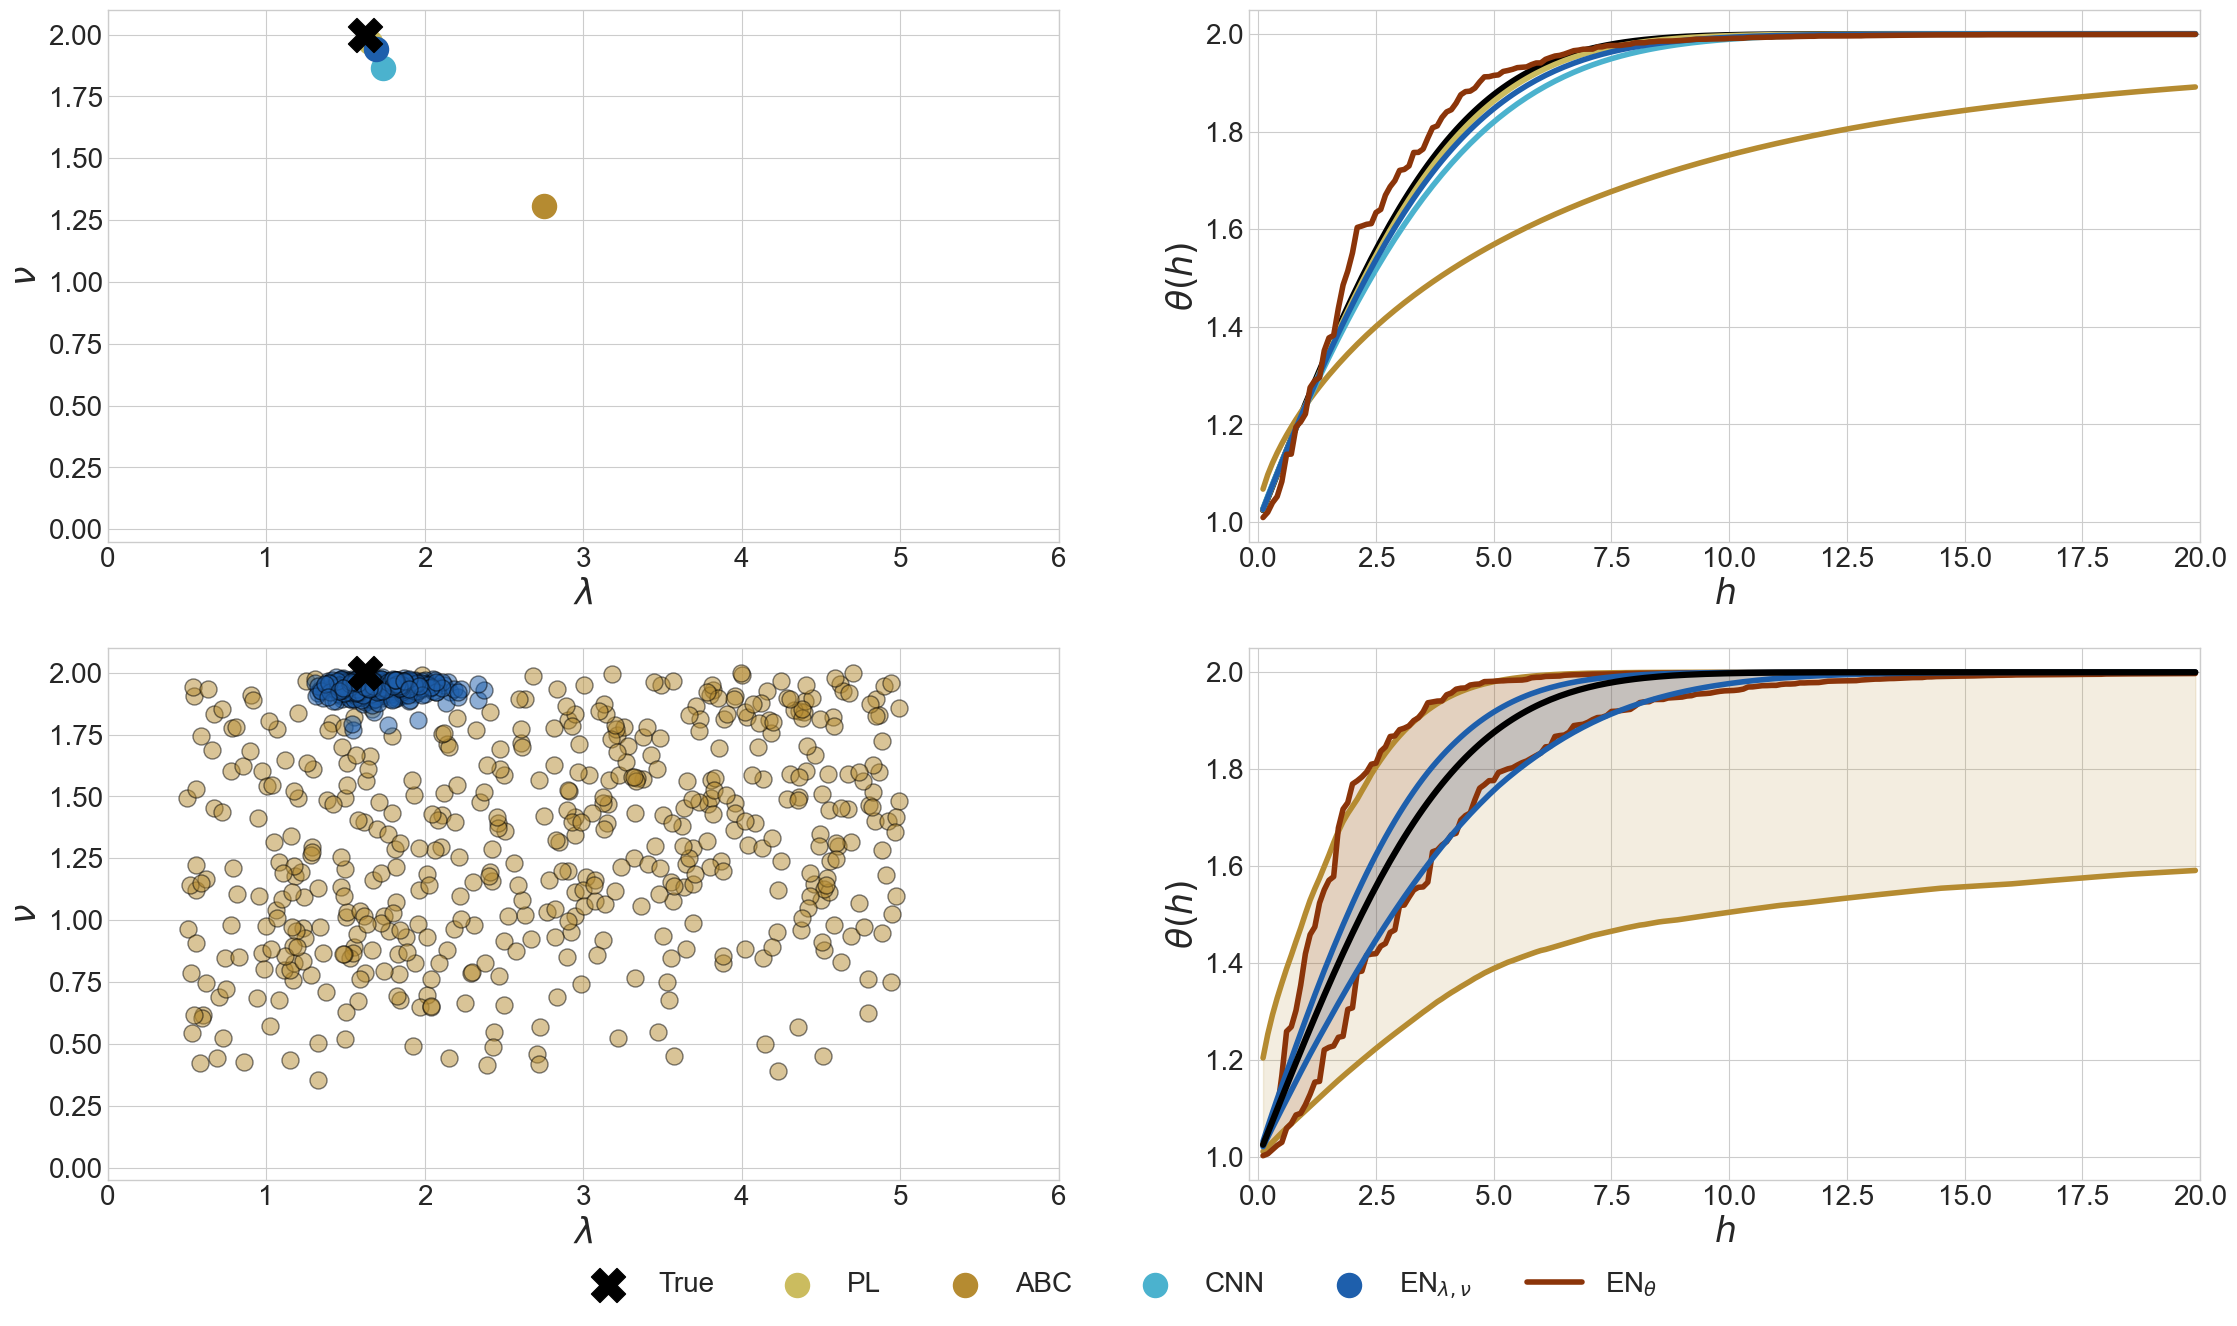

In [49]:
# Use sample 160
sample = 160

print(f"True parameters: {true_parameters[sample]}")


h = np.arange(0.1,20,0.1)
h_len = len(h)
fig, axs = plt.subplots(2, 2, figsize = (27,15))
axs = np.transpose(axs).ravel()

#Mean values
l1 = axs[0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
l2 = axs[0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
l3 = axs[0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
l4 = axs[0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
l5 = axs[0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
axs[0].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[0].set_ylabel(r"$\nu$", fontsize = axsize)
axs[0].tick_params(axis='both', labelsize=ticksize)
axs[0].set_xlim([0,6])
axs[0].set_ylim([-0.05,2.1])


# Sample values
axs[1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
axs[1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
axs[1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
axs[1].set_xlabel(r"$\lambda$", fontsize = axsize)
axs[1].set_ylabel(r"$\nu$", fontsize = axsize)
axs[1].tick_params(axis='both', labelsize=ticksize)
axs[1].set_xlim([0,6])
axs[1].set_ylim([-0.05,2.1])


# Extremal coefficient
axs[2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
axs[2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
axs[2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
axs[2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
l6, = axs[2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
axs[2].set_xlabel(r"$h$", fontsize = axsize)
axs[2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[2].tick_params(axis='both', labelsize=ticksize)
axs[2].set_xlim([-0.2,20])

# Extremal coefficient uncertainty
es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

axs[3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
axs[3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
axs[3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

axs[3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
axs[3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
axs[3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

axs[3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
axs[3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
axs[3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

axs[3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)


axs[3].set_xlabel(r"$h$", fontsize = axsize)
axs[3].set_ylabel(r"$\theta(h)$", fontsize = axsize)
axs[3].tick_params(axis='both', labelsize=ticksize)
axs[3].set_xlim([-0.2,20])

# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6],loc='lower center', ncol = 6, fontsize = legendsize)

#fig.suptitle(f"Test sample: {sample}", fontsize = titlesize)

plt.savefig(path + f"robust_results_example_smith_single.pdf", bbox_inches = "tight")

True parameters: [[1.71 2.  ]
 [1.92 2.  ]
 [1.75 2.  ]
 [2.31 2.  ]]


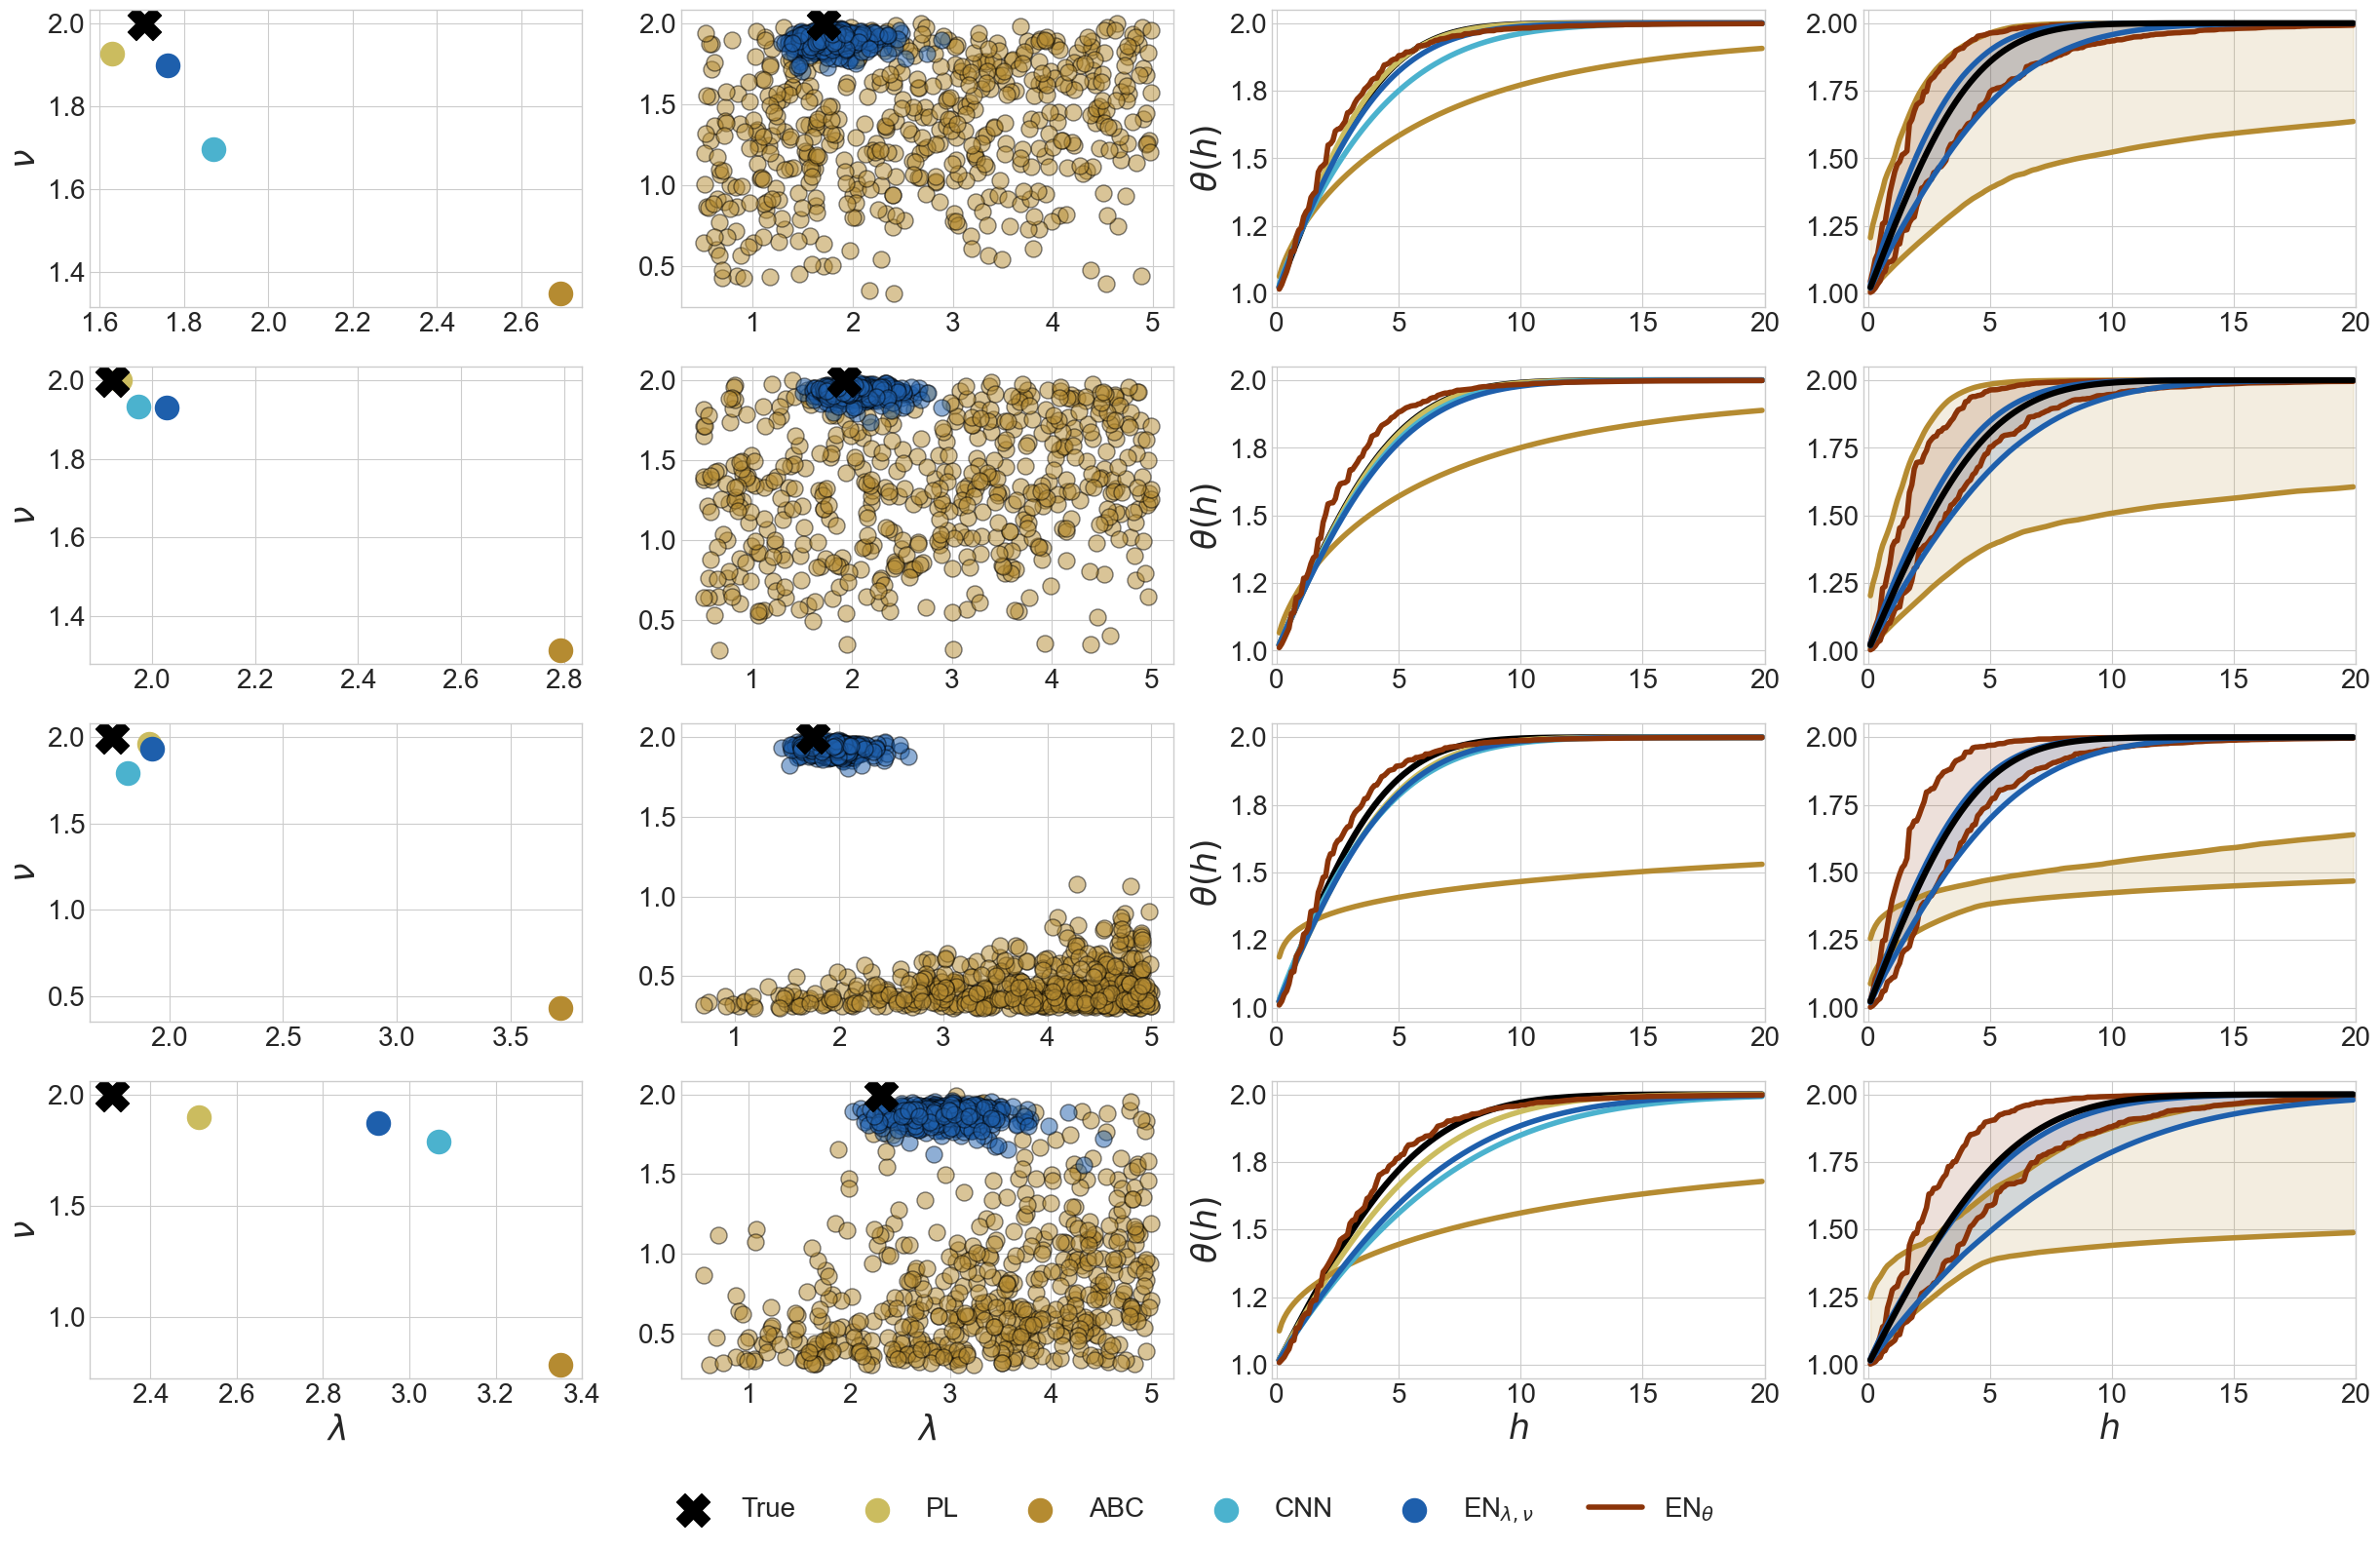

In [50]:
# Use randomly drawn samples
samples = [ 11,  41, 115,  18]#np.random.randint(0, n_test, size = 4)
print(f"True parameters: {true_parameters[samples].round(2)}")
h = np.arange(0.1,20,0.1)
h_len = len(h)

fig, axs = plt.subplots(4, 4, figsize = (30,18))

for i, sample in enumerate(samples):
    #Mean values
    l1 = axs[i,0].scatter(x = pl[sample,0], y = pl[sample,1], color = colors["PL"], s = 300, label = "PL")
    l2 = axs[i,0].scatter(x = abc_mean[sample,0], y = abc_mean[sample,1], color = colors["ABC"], s = 300, label = "ABC")
    l3 = axs[i,0].scatter(x = cnn[sample,0], y = cnn[sample,1], color = colors["CNN"], s = 300, label = "CNN")
    l4 = axs[i,0].scatter(x = cnn_es_mean[sample,0], y = cnn_es_mean[sample,1], color = colors["CNN_ES"], s = 300, label = r"EN$_{\lambda, \nu}$")
    l5 = axs[i,0].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"], label = "True")
    axs[3,0].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,0].set_ylabel(r"$\nu$", fontsize = axsize)
    axs[i,0].tick_params(axis='both', labelsize=ticksize)

    # Sample values
    axs[i,1].scatter(x = abc[sample,0], y = abc[sample,1], alpha = 0.5, color = colors["ABC"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = cnn_es[sample,0], y = cnn_es[sample,1], alpha = 0.5, color = colors["CNN_ES"], s = 150, edgecolors = "black")
    axs[i,1].scatter(x = true_parameters[sample,0], y = true_parameters[sample,1], marker = "X", s = 600, color = colors["True"])
    axs[3,1].set_xlabel(r"$\lambda$", fontsize = axsize)
    axs[i,1].tick_params(axis='both', labelsize=ticksize)


    # Extremal coefficient
    axs[i,2].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[i,2].plot(h, extremal_coefficient(h, model, pl[sample,0], pl[sample,1])[0], color = colors["PL"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1]), color = colors["ABC"], lw = lw)
    axs[i,2].plot(h, extremal_coefficient(h, model, cnn[sample,0], cnn[sample,1])[0], color = colors["CNN"], lw = lw)
    axs[i,2].plot(h, sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1]), color = colors["CNN_ES"], lw = lw)
    l6, = axs[i,2].plot(h, aggregate_direct_estimation(cnn_direct, type = "mean")[sample,0:h_len], color = colors["CNN_direct"], lw = lw, label = r"EN$_{\theta}$")
    axs[3,2].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,2].set_ylabel(r"$\theta(h)$", fontsize = axsize)
    axs[i,2].tick_params(axis='both', labelsize=ticksize)
    axs[i,2].set_xlim([-0.2,20])
    axs[i,2].set_ylim([0.95,2.05])
    axs[i,2].yaxis.set_major_formatter('{x:.1f}')
    axs[i,2].yaxis.set_ticks(np.arange(1, 2.25, 1/4))

    # Extremal coefficient uncertainty
    es_quantiles = np.quantile(sample_extremal_coefficient(h, model, cnn_es[sample,0], cnn_es[sample,1],  mean = False), q = [0.025,0.975], axis = 0)
    abc_quantiles = np.quantile(sample_extremal_coefficient(h, model, abc[sample,0], abc[sample,1],  mean = False), q = [0.025,0.975], axis = 0)

    direct_left = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.025)[sample,0:h_len]
    direct_right = aggregate_direct_estimation(cnn_direct, type = "quantile", q = 0.975)[sample,0:h_len]

    axs[i,3].plot(h, abc_quantiles[0], color = colors["ABC"], lw = lw)
    axs[i,3].plot(h, abc_quantiles[1], color = colors["ABC"], lw = lw)
    axs[i,3].fill_between(h, abc_quantiles[0], abc_quantiles[1], color = colors["ABC"], alpha=.15)

    axs[i,3].plot(h, direct_left, color = colors["CNN_direct"], lw = lw)
    axs[i,3].plot(h, direct_right, color = colors["CNN_direct"], lw = lw)
    axs[i,3].fill_between(h, direct_left, direct_right, color = colors["CNN_direct"], alpha=.15)

    axs[i,3].plot(h, es_quantiles[0], color = colors["CNN_ES"], lw = lw)
    axs[i,3].plot(h, es_quantiles[1], color = colors["CNN_ES"], lw = lw)
    axs[i,3].fill_between(h, es_quantiles[0], es_quantiles[1],  color = colors["CNN_ES"], alpha=.15)

    axs[i,3].plot(h, extremal_coefficient(h, model, true_parameters[sample,0], true_parameters[sample,1])[0], color = colors["True"], lw = lw+0.5)
    axs[3,3].set_xlabel(r"$h$", fontsize = axsize)
    axs[i,3].tick_params(axis='both', labelsize=ticksize)
    axs[i,3].set_xlim([-0.2,20])
    axs[i,3].set_ylim([0.95,2.05])
    axs[i,3].yaxis.set_ticks(np.arange(1, 2.25, 1/4))


# Legend
fig.subplots_adjust(bottom=0.1)
fig.legend(labels = labels, handles = [l5, l1, l2, l3, l4, l6], loc='lower center', ncol = 6, fontsize = legendsize)

plt.savefig(path + f"robust_results_example_smith_multiple.pdf", bbox_inches = "tight")